In [1]:
#Mounting Google Drive

from google.colab import drive

drive.mount("./gdrive", force_remount=True)

%cd "./gdrive/My Drive/handwritten-text-recognition/src/"
!ls -l


Mounted at ./gdrive
/content/gdrive/My Drive/handwritten-text-recognition/src
total 788
-rw------- 1 root root 192449 Apr 30 15:36 after_gpt.csv
-rw------- 1 root root 226549 Apr 30 17:16 after-gpt-iam.csv
drwx------ 2 root root   4096 Apr 28 07:37 data
-rw------- 1 root root 173327 Apr 30 14:59 iam-test.csv
drwx------ 2 root root   4096 Apr 28 07:37 language
-rw------- 1 root root  11491 Apr 27 14:48 main.py
drwx------ 2 root root   4096 Apr 28 07:37 network
-rw------- 1 root root 173327 Apr 30 14:46 test.csv
-rw------- 1 root root  16178 Apr 27 14:48 tutorial.ipynb


In [2]:
!cd gdrive/MyDrive/handwritten-text-recognition/
!pip install -r requirements.txt

/bin/bash: line 0: cd: gdrive/MyDrive/handwritten-text-recognition/: No such file or directory
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [3]:
import os
import datetime
import string

# define parameters
source = "iam"
arch = "flor"
epochs = 300
batch_size = 16

# define paths
source_path = os.path.join("..", "data", f"{source}.hdf5")
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join(output_path, "checkpoint_weights.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128
charset_base = string.printable[:95]

print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)


source: ../data/iam.hdf5
output ../output/iam/flor
target ../output/iam/flor/checkpoint_weights.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 


In [4]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")


Train images: 6161
Validation images: 1840
Test images: 1861


In [5]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=arch,
                 input_size=input_size,
                 vocab_size=dtgen.tokenizer.vocab_size,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15,
                 reduce_factor=0.1)

model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1024, 128, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 512, 64, 16)       160       
                                                                 
 p_re_lu (PReLU)             (None, 512, 64, 16)       16        
                                                                 
 batch_normalization (BatchN  (None, 512, 64, 16)      112       
 ormalization)                                                   
                                                                 
 full_gated_conv2d (FullGate  (None, 512, 64, 16)      4640      
 dConv2D)                                                        
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 64, 32)       4640  

In [6]:
# Uncomment if you want to re-train the model

# # to calculate total and average time per epoch
# start_time = datetime.datetime.now()

# h = model.fit(x=dtgen.next_train_batch(),
#               epochs=epochs,
#               steps_per_epoch=dtgen.steps['train'],
#               validation_data=dtgen.next_valid_batch(),
#               validation_steps=dtgen.steps['valid'],
#               callbacks=callbacks,
#               shuffle=True,
#               verbose=1)

# total_time = datetime.datetime.now() - start_time

# loss = h.history['loss']
# val_loss = h.history['val_loss']

# min_val_loss = min(val_loss)
# min_val_loss_i = val_loss.index(min_val_loss)

# time_epoch = (total_time / len(loss))
# total_item = (dtgen.size['train'] + dtgen.size['valid'])

# t_corpus = "\n".join([
#     f"Total train images:      {dtgen.size['train']}",
#     f"Total validation images: {dtgen.size['valid']}",
#     f"Batch:                   {dtgen.batch_size}\n",
#     f"Total time:              {total_time}",
#     f"Time per epoch:          {time_epoch}",
#     f"Time per item:           {time_epoch / total_item}\n",
#     f"Total epochs:            {len(loss)}",
#     f"Best epoch               {min_val_loss_i + 1}\n",
#     f"Training loss:           {loss[min_val_loss_i]:.8f}",
#     f"Validation loss:         {min_val_loss:.8f}"
# ])

# with open(os.path.join(output_path, "train.txt"), "w") as lg:
#     lg.write(t_corpus)
#     print(t_corpus)


Model Predict
117/117 [==============================] - 202s 2s/step
CTC Decode
  1/117 [..............................] - ETA: 2:41

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


117/117 [==============================] - 144s 1s/step



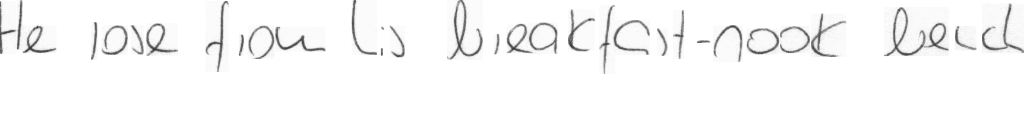

He rose from his breakfast-nook bench
He iose from his beakfait-noot benh 




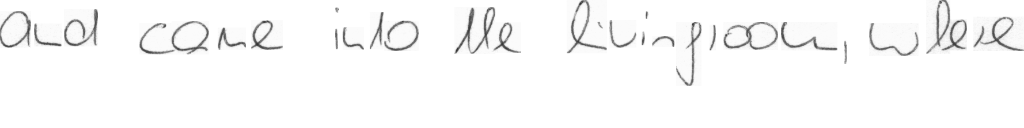

and came into the livingroom , where
and came into He lvingion , where 




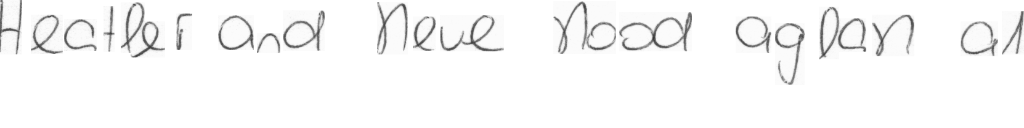

Heather and Steve stood aghast at
Heatler and Hene so0d aglan at 




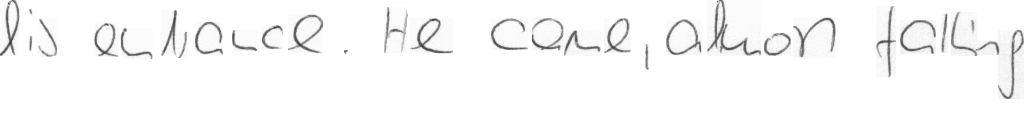

his entrance . He came , almost falling
lis entrance . He came , akmon falling 




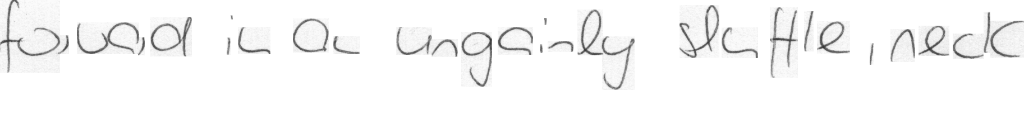

forward in an ungainly shuffle , neck
forward in an ungainly sluttle , necde 




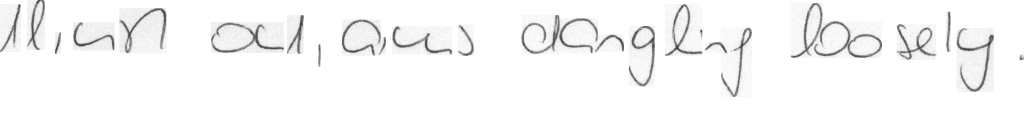

thrust out , arms dangling loosely .
l,no ond , ars langling loosely . 




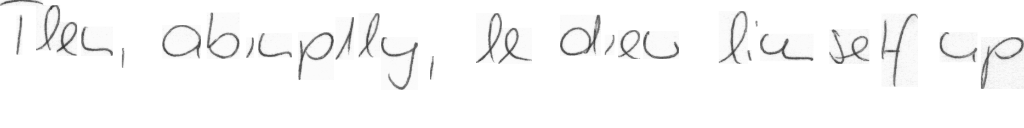

Then , abruptly , he drew himself up
Tlen , abmply , le diew licuself up 




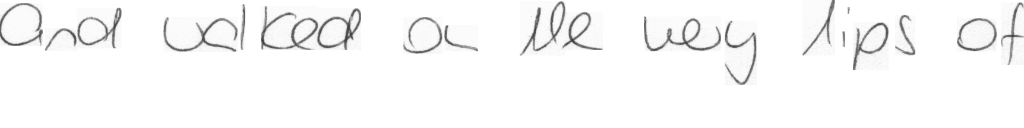

and walked on the very tips of
Ond walked on He nery lips of 




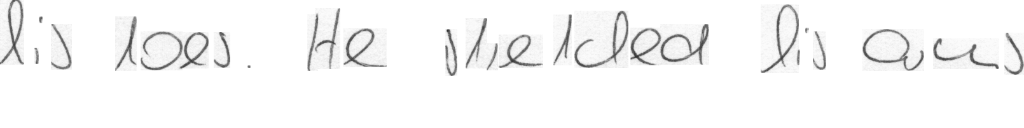

his toes . He stretched his arms
dis loes . He vtietded lis ovus 




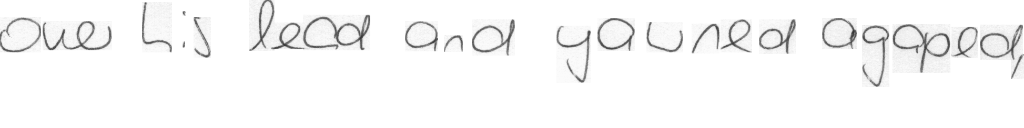

over his head and yawned agape ,
oner his lead and youned agaped , 



In [7]:
from data import preproc as pp
from google.colab.patches import cv2_imshow

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
ground_truth = [x.decode() for x in dtgen.dataset['test']['gt']]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, ground_truth):
        lg.write(f"TE_L {gt}\nTE_P {pd}\n")
   
for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
    print("=" * 1024, "\n")
    cv2_imshow(pp.adjust_to_see(item))
    print(ground_truth[i])
    print(predicts[i], "\n")


In [8]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts, ground_truth, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)


Total test images:    1861
Total time:           0:05:48.684385
Time per item:        0:00:00.187364

Metrics:
Character Error Rate: 0.06764897
Word Error Rate:      0.24456674
Sequence Error Rate:  0.81998925


In [9]:
import csv
with open("iam-test.csv", 'w') as csvfile: 
  csvwriter = csv.writer(csvfile) 
  csvwriter.writerow(["Ground_truth", "Prediction"]) 
  for i, item in enumerate(dtgen.dataset['test']['dt']):
    l = [ground_truth[i], predicts[i]]
    csvwriter.writerow(l)
    

In [10]:
!pip install openai
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 696.4/696.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.8 MB/s eta 0:00:00


In [13]:
from langchain import PromptTemplate, OpenAI, LLMChain
import os

OPENAI_API_KEY = input("Enter OpenAI API Key: ")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

def gpt_correction(result):
    template = """You are being fed data from a handwriting text recognition model, you are meant to make sense of the data. Keep in mind the sentences you are fed are not completely correct since the model often makes mistakes between similar looking letters based on the handwriting of the person. You are tasked with correcting any word of the sentence that does not make sense. Correct the words keeping in mind the words around it. Do not correct words that make some sense in context to the words around it. Remember these may not be complete sentences but parts of a sentence.:-

    Incorrect sentence: {input}

    Correct sentence: 
    """
    prompt = PromptTemplate(template=template, input_variables=["input"])
    llm_chain = LLMChain(prompt=prompt, llm=OpenAI(temperature=0), verbose=False)

    result = llm_chain.predict(input = result)
    return result


In [20]:
import pandas as pd
df = pd.read_csv("after-gpt-iam.csv") 
df.head()

,Unnamed: 0,Ground_truth,Prediction,trial,trial2
0,0,He rose from his breakfast-nook bench,He iose from his beakfait-noot benh,\nHe rose from his breakfast-table bench.,He rose from his breakfast-table bench.
1,1,"and came into the livingroom , where","and came into He lvingion , where","\nand came into Helvington, where","\nand came into Helvington, where"
2,2,Heather and Steve stood aghast at,Heatler and Hene so0d aglan at,\nHeater and Henes stood alone at,\nHeater and Henes stood alone at
3,3,"his entrance . He came , almost falling","lis entrance . He came , akmon falling","\n His entrance. He came, ackon falling.","\n His entrance. He came, ackon falling."
4,4,"forward in an ungainly shuffle , neck","forward in an ungainly sluttle , necde","\nForward in an ungainly shuffle, need.","\nForward in an ungainly shuffle, need."


In [15]:
# for i in range (0,800):
#   df.loc[i,"trial2"]=gpt_correction(df.loc[i,"Prediction"])
# df.head()

KeyboardInterrupt: ignored

In [ ]:
# df.to_csv('after-gpt-iam.csv')


In [21]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts, ground_truth, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)


Total test images:    1861
Total time:           0:05:48.684385
Time per item:        0:00:00.187364

Metrics:
Character Error Rate: 0.06764897
Word Error Rate:      0.24456674
Sequence Error Rate:  0.81998925


In [22]:
pred_list = df["Prediction"][0:800].tolist()
gt_list = df["Ground_truth"][0:800].tolist()
gpt_list = df["trial"][0:800].tolist()

In [23]:
trial_list = df["trial2"][0:800].tolist()

In [24]:
#Removing \n from df entries
copy_list = []
for i in range(0,800):
  s = df.loc[i, "trial2"]
  a = s[1:]
  copy_list.append(a)
print(copy_list)

['He rose from his breakfast-table bench.', 'and came into Helvington, where', 'Heater and Henes stood alone at', '    His entrance. He came, ackon falling.', 'Forward in an ungainly shuffle, need.', "    No one's arms were dangling loosely.", 'Then, simply, he drew himself up.', 'One walked on the very lips of', 'This loss. He attended his house.', 'One followed his lead and you gazed agape.', 'Drawing in great balls of yarn.', 'Became a success otecsiav', 'They had come! "He said reverently, gripping his', 'hands together between his knees and leaning', '"Isn\'t it a glorious thing! Long awaited."', '    Transcendent event, the exalted desire of all.', 'Mankind through all ages! The kingdom of the', 'Mind is at hand! He turned beaming eyes.', 'upward and shook his head slowly from side to side.', 'A superfluous precaution, for there was no other car.', '    No road; and no pedestrian to cross his path nor to wait.', 'At an intersection for the light to change, he waited.', '    He pa

In [25]:
#Removing whitespace from list elements
copy = copy_list
strip_list = []
for i in copy:
  i = i.strip()
  strip_list.append(i)
print(strip_list)

['He rose from his breakfast-table bench.', 'and came into Helvington, where', 'Heater and Henes stood alone at', 'His entrance. He came, ackon falling.', 'Forward in an ungainly shuffle, need.', "No one's arms were dangling loosely.", 'Then, simply, he drew himself up.', 'One walked on the very lips of', 'This loss. He attended his house.', 'One followed his lead and you gazed agape.', 'Drawing in great balls of yarn.', 'Became a success otecsiav', 'They had come! "He said reverently, gripping his', 'hands together between his knees and leaning', '"Isn\'t it a glorious thing! Long awaited."', 'Transcendent event, the exalted desire of all.', 'Mankind through all ages! The kingdom of the', 'Mind is at hand! He turned beaming eyes.', 'upward and shook his head slowly from side to side.', 'A superfluous precaution, for there was no other car.', 'No road; and no pedestrian to cross his path nor to wait.', 'At an intersection for the light to change, he waited.', 'He parked his car in the 

In [26]:
#Evaluation without gpt post-processing
from data import evaluation

evaluate = evaluation.ocr_metrics(pred_list, gt_list, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)


Total test images:    1861
Total time:           0:05:48.684385
Time per item:        0:00:00.187364

Metrics:
Character Error Rate: 0.06437234
Word Error Rate:      0.23882640
Sequence Error Rate:  0.80875000


In [27]:
print(strip_list)

['He rose from his breakfast-table bench.', 'and came into Helvington, where', 'Heater and Henes stood alone at', 'His entrance. He came, ackon falling.', 'Forward in an ungainly shuffle, need.', "No one's arms were dangling loosely.", 'Then, simply, he drew himself up.', 'One walked on the very lips of', 'This loss. He attended his house.', 'One followed his lead and you gazed agape.', 'Drawing in great balls of yarn.', 'Became a success otecsiav', 'They had come! "He said reverently, gripping his', 'hands together between his knees and leaning', '"Isn\'t it a glorious thing! Long awaited."', 'Transcendent event, the exalted desire of all.', 'Mankind through all ages! The kingdom of the', 'Mind is at hand! He turned beaming eyes.', 'upward and shook his head slowly from side to side.', 'A superfluous precaution, for there was no other car.', 'No road; and no pedestrian to cross his path nor to wait.', 'At an intersection for the light to change, he waited.', 'He parked his car in the 

In [28]:
#Evaluation after gpt post-processing
from data import evaluation

evaluate = evaluation.ocr_metrics(strip_list, gt_list, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)


Total test images:    1861
Total time:           0:05:48.684385
Time per item:        0:00:00.187364

Metrics:
Character Error Rate: 0.14020413
Word Error Rate:      0.19797336
Sequence Error Rate:  0.93750000


In [ ]:
print(copy_list)
print(gt_list)
print(pred_list)

['He rose from his breakfast-table bench.', 'and came into Helvington, where', 'Heater and Henes stood alone at', '    His entrance. He came, ackon falling.', 'Forward in an ungainly shuffle, need.', "    No one's arms were dangling loosely.", 'Then, simply, he drew himself up.', 'One walked on the very lips of', 'This loss. He attended his house.', 'One followed his lead and you gazed agape.', 'Drawing in great balls of yarn.', 'Became a success otecsiav', 'They had come! "He said reverently, gripping his', 'hands together between his knees and leaning', '"Isn\'t it a glorious thing! Long awaited."', '    Transcendent event, the exalted desire of all.', 'Mankind through all ages! The kingdom of the', 'Mind is at hand! He turned beaming eyes.', 'upward and shook his head slowly from side to side.', 'A superfluous precaution, for there was no other car.', '    No road; and no pedestrian to cross his path nor to wait.', 'At an intersection for the light to change, he waited.', '    He pa

In [ ]:
comb_gt_list = []
comb_gpt_list = []
comb_p_list = []
for i in range(0, len(ground_truth), 10):
  line1 = ' '.join(ground_truth[i:i+10])
  comb_gt_list.append(line1)
  line2 = ' '.join(strip_list[i:i+10])
  comb_gpt_list.append(line2)
  line3 = ' '.join(predicts[i:i+10])
  comb_p_list.append(line3)
# print(Levenshtein.ratio(line1, line2))
# print(Levenshtein.ratio(line1, line3))
print(comb_gt_list)
print(comb_gpt_list)
print(comb_p_list)


['He rose from his breakfast-nook bench and came into the livingroom , where Heather and Steve stood aghast at his entrance . He came , almost falling forward in an ungainly shuffle , neck thrust out , arms dangling loosely . Then , abruptly , he drew himself up and walked on the very tips of his toes . He stretched his arms over his head and yawned agape ,', 'drawing-in great breaths that became great sighs of ecstacy . " They have come ! " he said reverently , gripping his hands together between his knees and leaning forward . " Isn\'t it a glorious thing ! Long awaited transcendent event , the exalted desire of all mankind through all ages ! The Kingdom of the Mind is at hand ! " He turned beaming eyes upward and shook his head slowly from A superfluous precaution for there was no other car', 'abroad ; and no pedestrian to cross his path nor to wait at an intersection for the light to change . At his apartment he garaged his car and then stood listening in the night . Listening in v

In [ ]:
len(comb_p_list)

187

['\nHe rose from his breakfast-table bench and came into the living room, where Hitler and Hene stood agape at his entrance. He came, arms akimbo, falling forward in an ungainly shuffle, knees knocking one, arms dangling loosely. Then, abruptly, he drew himself up and walked on the very tips of his toes. He veiled his eyes over his head and stood agape,']


In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.8 MB/s eta 0:00:00


In [ ]:
import Levenshtein
import difflib
l_ratio = []
diff_ratio = []
for i in range(0, 162):
  l_ratio.append(Levenshtein.ratio(a_list[i], ground_truth[i]))
  diff_ratio.append(difflib.SequenceMatcher(None, a_list[i], ground_truth[i], autojunk=False).ratio())
print(l_ratio)
print(diff_ratio)
print(sum(l_ratio)/len(l_ratio))
print(sum(diff_ratio)/len(diff_ratio))

[0.9791666666666666, 0.9655172413793104, 1.0, 0.9032258064516129, 0.75, 0.8536585365853658, 0.9345794392523364, 0.9278350515463918, 0.9148936170212766, 0.8910891089108911, 0.946236559139785, 1.0, 0.9512195121951219, 0.9032258064516129, 0.7173913043478262, 0.9069767441860466, 0.9230769230769231, 0.8333333333333334, 0.8607594936708861, 0.19047619047619047, 0.8076923076923077, 0.8928571428571429, 0.9696969696969697, 0.8923076923076922, 0.7142857142857143, 0.9, 0.8405797101449275, 0.9189189189189189, 0.9090909090909091, 0.968421052631579, 0.9230769230769231, 0.989247311827957, 0.9425287356321839, 0.8761904761904762, 0.8631578947368421, 0.9397590361445783, 0.9438202247191011, 0.8653846153846154, 0.9113924050632911, 0.925, 0.9438202247191011, 0.7441860465116279, 0.8705882352941177, 0.935064935064935, 0.8421052631578947, 0.85, 0.9534883720930233, 0.7692307692307692, 0.9375, 0.735632183908046, 0.8809523809523809, 0.925, 0.9259259259259259, 0.8709677419354839, 0.6461538461538461, 0.928571428571

In [ ]:
print(predicts)
predicts.pop(0)

['h. ger.', 'Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by andther, who can have no', 'other pretence, than th at of having a Commis', 'sion from the Wing.', 'We shall suffer very greatly in a Little', 'time, for want of Closhing for the Soldier; and none', 'can be had here, nor in Short, S believe in the', 'Country. Those which Carlyle and Balton con-', 'tracted to furmish, we are disappointed in; and', 'they sy they huwe, searched all the Starer in', 'Maryland, as will as this part of Virginia, and', 'mone are able to furnish Clother. Ae have', 'sustained inconceiwable lofses by the Comms', 'sariey delays; many of the Carohina Beeves', 'are dead, through poverty and bad manage-', 'ment; and the chif of thim are to por to', 'saughter. Pray make my Compliments', 'to my Friends belon; and believe me Vc-', 'G.W.', '1s. 1s. The Commitece SCelieve.', 'have not yet fixed the pay of', 'the Licutenant Colonel and Rajor.', 'IP

'h. ger.'

In [ ]:
print(predicts)

['Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by andther, who can have no', 'other pretence, than th at of having a Commis', 'sion from the Wing.', 'We shall suffer very greatly in a Little', 'time, for want of Closhing for the Soldier; and none', 'can be had here, nor in Short, S believe in the', 'Country. Those which Carlyle and Balton con-', 'tracted to furmish, we are disappointed in; and', 'they sy they huwe, searched all the Starer in', 'Maryland, as will as this part of Virginia, and', 'mone are able to furnish Clother. Ae have', 'sustained inconceiwable lofses by the Comms', 'sariey delays; many of the Carohina Beeves', 'are dead, through poverty and bad manage-', 'ment; and the chif of thim are to por to', 'saughter. Pray make my Compliments', 'to my Friends belon; and believe me Vc-', 'G.W.', '1s. 1s. The Commitece SCelieve.', 'have not yet fixed the pay of', 'the Licutenant Colonel and Rajor.', 'IPnay propose

In [ ]:
import Levenshtein
import difflib
l_ratio = []
diff_ratio = []
for i in range(0, 162):
  l_ratio.append(Levenshtein.ratio(predicts[i], ground_truth[i]))
  diff_ratio.append(difflib.SequenceMatcher(None, a_list[i], ground_truth[i], autojunk=False).ratio())
print(l_ratio)
print(diff_ratio)
print(sum(l_ratio)/len(l_ratio))
print(sum(diff_ratio)/len(diff_ratio))

[1.0, 1.0, 0.975, 0.9555555555555556, 0.9473684210526316, 0.975, 0.9714285714285714, 0.9574468085106383, 0.9772727272727273, 0.9787234042553191, 0.8791208791208791, 0.9787234042553191, 0.926829268292683, 0.9090909090909091, 0.9285714285714286, 1.0, 0.9397590361445783, 0.9855072463768116, 0.9487179487179487, 1.0, 0.7213114754098361, 1.0, 0.9393939393939394, 0.9230769230769231, 0.8571428571428572, 0.9333333333333333, 0.8955223880597015, 0.9230769230769231, 0.9428571428571428, 1.0, 0.9772727272727273, 0.945054945054945, 0.9302325581395349, 0.9090909090909091, 0.896551724137931, 0.9069767441860466, 0.9411764705882353, 0.9247311827956989, 0.925, 0.8947368421052632, 0.9782608695652174, 0.9512195121951219, 0.9882352941176471, 0.9743589743589743, 0.9148936170212766, 1.0, 0.9655172413793104, 0.9285714285714286, 1.0, 0.8860759493670887, 0.962962962962963, 1.0, 0.962962962962963, 0.8571428571428572, 0.9180327868852459, 0.896551724137931, 1.0, 1.0, 0.9210526315789473, 0.9534883720930233, 1.0, 1.0,

In [ ]:
combined_list = ' '.join(predicts)
print(combined_list)

Letters Orders and Instructions. December 1755. to go to a place where I am to be commanded and directed by andther, who can have no other pretence, than th at of having a Commis sion from the Wing. We shall suffer very greatly in a Little time, for want of Closhing for the Soldier; and none can be had here, nor in Short, S believe in the Country. Those which Carlyle and Balton con- tracted to furmish, we are disappointed in; and they sy they huwe, searched all the Starer in Maryland, as will as this part of Virginia, and mone are able to furnish Clother. Ae have sustained inconceiwable lofses by the Comms sariey delays; many of the Carohina Beeves are dead, through poverty and bad manage- ment; and the chif of thim are to por to saughter. Pray make my Compliments to my Friends belon; and believe me Vc- G.W. 1s. 1s. The Commitece SCelieve. have not yet fixed the pay of the Licutenant Colonel and Rajor. IPnay propose it, and Let me know their Rerole. Alexandria December 1st. 1755. 1st. 

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 400,
    chunk_overlap  = 0,
    length_function = len,
)
texts = text_splitter.create_documents([predicts])

In [ ]:
print(gpt_correction(texts[0]))


Page_content='Letters Orders and Instructions. December 1755. to go to a place where I am to be commanded and directed by another, who can have no other pretence than that of having a Commission from the King. We shall suffer very greatly in a little time, for want of clothing for the soldiers; and none can be had here, nor I believe in the country. Those which Carlyle and Bolton can-' metadata={}


In [ ]:
trial=ground_truth[0:9]
print(trial)

['Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by another, who can have no', 'other pretence, than that of having a commis-', 'sion from the King.', 'We shall suffer very greatly in a little', 'time, for want of Clothing for the Soldiers; and none', 'can be had here, nor in short, I believe in the', 'Country. Those which Carlyle and Dalton con-']


In [ ]:
combined_trial = ' '.join(trial)

In [ ]:
Levenshtein.ratio("Letters Orders and Instructions. December 1755. to go to a place where I am to be commanded and directed by another, who can have no other pretence than that of having a Commission from the King. We shall suffer very greatly in a little time, for want of clothing for the soldiers; and none can be had here, nor I believe in the country. Those which Carlyle and Bolton can-", combined_trial)

0.9644268774703557

In [ ]:
print(a_list[0:9])
print(ground_truth[0:9])
print(predicts[0:9])

['Letters, Orders, and Instructions. December 1755.', 'To go to a place where I am to be commanded.', 'and directed by another, who can have no', 'other pretense, than that of having a Commission', '    Decision from the voting.', 'We shall suffer greatly in a little while.', 'Time, for want of clothing for the soldiers; and none.', 'Can be had here, nor in short, they believe in the', 'Country. Those which Carlyle and Dalton conjoined.']
['Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by another, who can have no', 'other pretence, than that of having a commis-', 'sion from the King.', 'We shall suffer very greatly in a little', 'time, for want of Clothing for the Soldiers; and none', 'can be had here, nor in short, I believe in the', 'Country. Those which Carlyle and Dalton con-']
['Letters Orders and Instructions. December 1755.', 'to go to a place where I am to be commanded', 'and directed by andther, who can have no',

In [ ]:
gt_list = []
new_list = []
p_list = []
for i in range(0, len(ground_truth), 9):
  line1 = ' '.join(ground_truth[i:i+9])
  gt_list.append(line1)
  line2 = ' '.join(a_list[i:i+9])
  new_list.append(line2)
  line3 = ' '.join(predicts[i:i+9])
  p_list.append(line3)
# print(Levenshtein.ratio(line1, line2))
# print(Levenshtein.ratio(line1, line3))
print(gt_list)
print(new_list)
print(p_list)


['Letters Orders and Instructions. December 1755. to go to a place where I am to be commanded and directed by another, who can have no other pretence, than that of having a commis- sion from the King. We shall suffer very greatly in a little time, for want of Clothing for the Soldiers; and none can be had here, nor in short, I believe in the Country. Those which Carlyle and Dalton con-', 'tracted to furnish, we are disappointed in; and they say, they have searched all the Stores in Maryland, as well as this part of Virginia, and none are able to furnish Clothes. We have sustained inconceivable losses by the commis- saries delays: many of the Carolina Beeves are dead, through poverty and bad manage- ment; and the chief of them are too poor to slaughter. Pray make my Compliments', 'to my Friends below; and believe me Vc. G.W. P.S. The Committee, I believe, have not yet fixed the pay of the Lieutenant Colonel and Major. Pray propose it, and let me know their Resolves. Alexandria December 

In [ ]:
copy = a_list
strip_list = []
for i in copy:
  i = i.strip()
  strip_list.append(i)
print(strip_list)


['Letters, Orders, and Instructions. December 1755.', 'To go to a place where I am to be commanded.', 'and directed by another, who can have no', 'other pretense, than that of having a Commission', 'Decision from the voting.', 'We shall suffer greatly in a little while.', 'Time, for want of clothing for the soldiers; and none.', 'Can be had here, nor in short, they believe in the', 'Country. Those which Carlyle and Dalton conjoined.', 'Contracted to furnish, we are disappointed in; one', 'They say, they have searched all the stores in.', 'Maryland, as well as this part of Virginia, and', 'None are able to furnish clothes. We have', 'Sustained inconceivable losses by the Commission', 'Delays werearies; many of the Carolina Beavers', 'Are dead, through poverty and bad management.', 'Ment; and the chief of them are too poor to buy.', 'Laughter. Please make my compliments.', 'To my friends belong; and believe me we.', 'George Washington', 'The Committee believe.', 'Have not yet fixed the p

In [ ]:
from data import evaluation

evaluate = evaluation.ocr_metrics(strip_list, ground_truth, norm_accentuation=True, norm_punctuation=True)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])
print(e_corpus)
# with open(os.path.join(output_path, "new_gpt_eval.txt"), "w") as lg:
#     lg.write(e_corpus)
#     print(e_corpus)


Total test images:    163
Total time:           0:00:30.065598
Time per item:        0:00:00.184452

Metrics:
Character Error Rate: 0.13025820
Word Error Rate:      0.22347171
Sequence Error Rate:  0.80864198


In [ ]:
!pip install nltk numpy
import numpy as np
from nltk.tokenize import word_tokenize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def alignment_cost_matrix(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-1):
    m, n = len(seq1), len(seq2)
    cost_matrix = np.zeros((m + 1, n + 1), dtype=int)

    for i in range(1, m + 1):
        cost_matrix[i, 0] = cost_matrix[i - 1, 0] + gap_penalty

    for j in range(1, n + 1):
        cost_matrix[0, j] = cost_matrix[0, j - 1] + gap_penalty

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = cost_matrix[i - 1, j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = cost_matrix[i - 1, j] + gap_penalty
            insert = cost_matrix[i, j - 1] + gap_penalty
            cost_matrix[i, j] = max(match, delete, insert)

    return cost_matrix


In [ ]:
def backtrack_alignment(seq1, seq2, cost_matrix, match_score=1, mismatch_score=-1, gap_penalty=-1):
    aligned_seq1 = []
    aligned_seq2 = []

    i, j = len(seq1), len(seq2)

    while i > 0 and j > 0:
        if cost_matrix[i, j] == cost_matrix[i - 1, j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score):
            aligned_seq1.insert(0, seq1[i - 1])
            aligned_seq2.insert(0, seq2[j - 1])
            i -= 1
            j -= 1
        elif cost_matrix[i, j] == cost_matrix[i - 1, j] + gap_penalty:
            aligned_seq1.insert(0, seq1[i - 1])
            aligned_seq2.insert(0, '-')
            i -= 1
        else:
            aligned_seq1.insert(0, '-')
            aligned_seq2.insert(0, seq2[j - 1])
            j -= 1

    while i > 0:
        aligned_seq1.insert(0, seq1[i - 1])
        aligned_seq2.insert(0, '-')
        i -= 1

    while j > 0:
        aligned_seq1.insert(0, '-')
        aligned_seq2.insert(0, seq2[j - 1])
        j -= 1

    return aligned_seq1, aligned_seq2


In [ ]:
def cer_plus_plus(ground_truth, generated_transcription):
    ground_truth_tokens = word_tokenize(ground_truth)
    generated_tokens = word_tokenize(generated_transcription)
    cost_matrix = alignment_cost_matrix(ground_truth_tokens, generated_tokens)
    aligned_ground_truth, aligned_generated = backtrack_alignment(ground_truth_tokens, generated_tokens, cost_matrix)

    errors = 0
    for gt, gen in zip(aligned_ground_truth, aligned_generated):
        if gt != gen:
            errors += 1

    total_characters = len(''.join(ground_truth_tokens))
    cer_plus_plus = errors / total_characters * 100

    return cer_plus_plus


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
cer_pp = 0
for i in range(len(strip_list)):
  cer_pp = cer_pp + cer_plus_plus(gt_list[i], strip_list[i])
aver_cer_pp = cer_pp/len(strip_list)
print(aver_cer_pp)

8.68919568815922


In [ ]:
cer_pp = 0
for i in range(len(strip_list)):
  cer_pp = cer_pp + cer_plus_plus(gt_list[i], pred_list[i])
aver_cer_pp = cer_pp/len(strip_list)
print(aver_cer_pp)

5.758543603219945
